In [ ]:
pip install tensorflow matplotlib scikit-learn


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, Input
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

x_train, x_test = x_train / 255.0, x_test / 255.0

y_train_cat = tf.keras.utils.to_categorical(y_train, 10)
y_test_cat = tf.keras.utils.to_categorical(y_test, 10)


In [ ]:
input_layer = Input(shape=(32, 32, 3))

x = layers.Conv2D(32, (3,3), activation='relu')(input_layer)
x = layers.MaxPooling2D((2,2))(x)

x = layers.Conv2D(64, (3,3), activation='relu')(x)
x = layers.MaxPooling2D((2,2))(x)

x = layers.Conv2D(128, (3,3), activation='relu')(x)
x = layers.Flatten()(x)

x = layers.Dense(128, activation='relu')(x)
x = layers.Dropout(0.5)(x)

output_layer = layers.Dense(10, activation='softmax')(x)

model = models.Model(inputs=input_layer, outputs=output_layer)
model.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 356,810 (1.36 MB)

 Trainable params: 356,810 (1.36 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train_cat,
                    epochs=10,
                    batch_size=64,
                    validation_split=0.2)


Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 38s 58ms/step - accuracy: 0.2756 - loss: 1.9198 - val_accuracy: 0.4876 - val_loss: 1.4217
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 35s 56ms/step - accuracy: 0.5009 - loss: 1.3969 - val_accuracy: 0.5823 - val_loss: 1.1724
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 40s 56ms/step - accuracy: 0.5715 - loss: 1.2131 - val_accuracy: 0.5981 - val_loss: 1.1412
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 42s 57ms/step - accuracy: 0.6123 - loss: 1.1042 - val_accuracy: 0.6199 - val_loss: 1.0805
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 37s 60ms/step - accuracy: 0.6487 - loss: 1.0063 - val_accuracy: 0.6669 - val_loss: 0.9558
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 36s 57ms/step - accuracy: 0.6780 - loss: 0.9241 - val_accuracy: 0.6909 - val_loss: 0.8862
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 57ms/step - accuracy: 0.7032 - loss: 0.8620 - val_accuracy: 0.6945 - val_loss: 0.8812
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 57ms/step - accuracy: 0.7190 - loss: 0.7977 - 

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test_cat)
print(f"Test Accuracy: {test_acc:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.7306 - loss: 0.8057
Test Accuracy: 0.7286


In [ ]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = y_test.flatten()

print("Classification Report:\n", classification_report(y_true, y_pred_classes))
cm = confusion_matrix(y_true, y_pred_classes)
print("Confusion Matrix:\n", cm)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.81      0.77      1000
           1       0.82      0.87      0.84      1000
           2       0.63      0.61      0.62      1000
           3       0.54      0.56      0.55      1000
           4       0.71      0.66      0.68      1000
           5       0.59      0.64      0.61      1000
           6       0.82      0.78      0.80      1000
           7       0.78      0.75      0.77      1000
           8       0.84      0.84      0.84      1000
           9       0.85      0.77      0.81      1000

    accuracy                           0.73     10000
   macro avg       0.73      0.73      0.73     10000
weighted avg       0.73      0.73      0.73     10000

Confusion Matrix:
 [[815  19  40  10  10   6   3  13  58  26]
 [ 21 869   7   7   4  13   7   1  26  45]
 [ 79   7 609  71  76  68  44  26  12   8]
 [ 30  10  68 557  50 180  4

In [ ]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

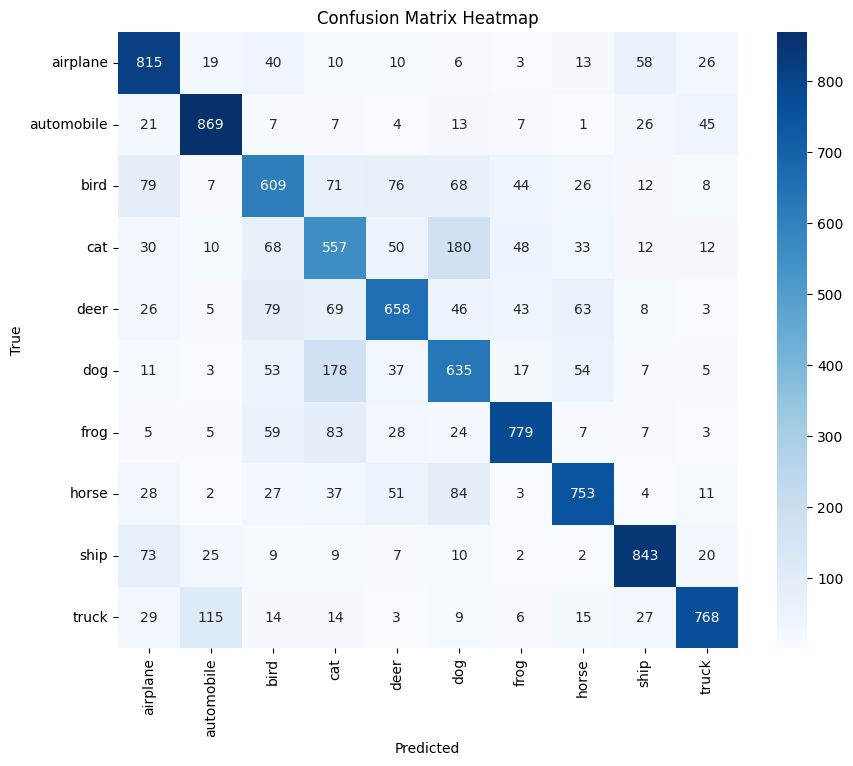

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names)

plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix Heatmap')
plt.show()


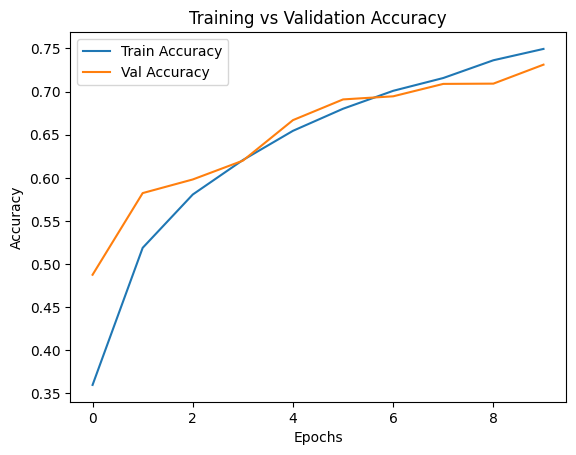

In [ ]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')
plt.show()
